In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [7]:
!pip install graphviz==0.10
!apt-get install graphviz

  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [8]:
from sklearn.tree import export_graphviz
import graphviz

In [5]:
dados = pd.read_csv('carros_vendas_modelo.csv')
dados.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,idade_carro,km_por_ano
0,21801,2000,30941.02,1,23,35085.22134
1,7843,1998,40557.96,1,25,12622.05362
2,7109,2006,89627.50,0,17,11440.79806
3,26823,2015,95276.14,0,8,43167.32682
4,7935,2014,117384.68,1,9,12770.11290


In [10]:
x = dados[['preco', 'idade_carro', 'km_por_ano']]
y = dados['vendido']

In [12]:
#Divisão do conjunto de dados: treino e teste
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 7500 elementos e testaremos com 2500 elementos


In [21]:
#DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = modelo.score(teste_x, teste_y)*100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 79.28%


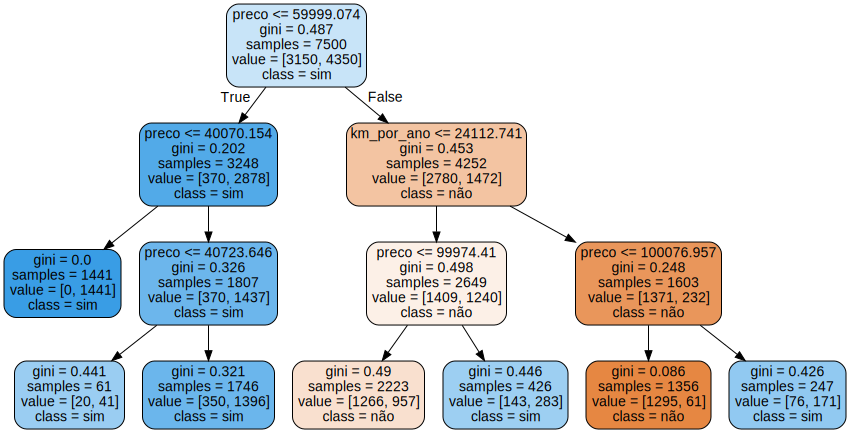

In [22]:
#Plotar o como o modelo DecisionTreeClassifier tem chegado nos resultados
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico